<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-01-Dealing-With-Data/blob/master/module1-afirstlookatdata/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## chapter 20 in this book http://www.inference.org.uk/itprnn/book.pdf

import numpy as np
import random as r

# we're gonna cluster this 2d toydata into 4 clusters
t = 100
N = 75

tdX = [t * r.random() for _ in range(N)]
tdY = [t * r.random() for _ in range(N)] 
tdZ = [None for _ in range(N)]

# td :: ([float],[float],[int])
td = (tdX, tdY, tdZ)

# The point of the third feature will be to denote which centroid is responsible for datapoint n. It will be marked something in range(K). 


In [0]:
# K-means clustering

# fix K
K = 3

# init means, our first-guess centroids
mX = [t * r.random() for _ in range(K)]
mY = [t * r.random() for _ in range(K)]


m = (mX, mY)


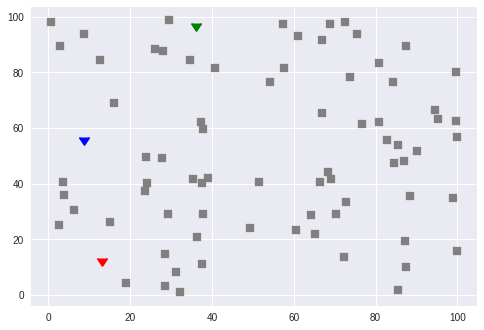

In [9]:
## show graph

import matplotlib.pyplot as plt

# cluster colors
# cm = rand_cmap(K)
cm = ['r', 'b', 'g', 'm', 'y']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(td[0], td[1], s=50, c='GREY', marker='s', label='toydata')
for k in range(K): 
  ax.scatter(m[0][k], m[1][k], s=100, c=cm[k], marker=11, label='means')

# plt.legend(loc='upper left');
plt.show()

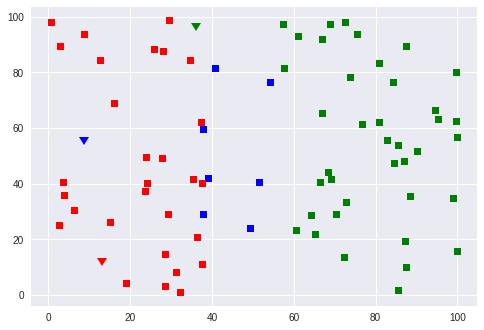

In [10]:
from functools import partial
from math import sqrt

# d : [float]^2 -> [float]^2 -> float
def d(m,xs):
  # euclidean distance between two points over R2
  return sqrt( (xs[0]-m[0])**2 + (xs[1]-m[1])**2 )
  
def de(ms,xs):
  # distance suggested in book, 
  return (1.0/2) * ( (xs[0]-ms[0])**2 + (xs[1]-ms[1])**2 )

# td0 :: [(float,float)]
td0 = list(zip(tdX,tdY))

m0 = list(zip(mX,mY))


def argmin(f, s=K):
  # for functions [0..s-1] -> Num, take a min over all its outputs and figure out which input made that one
  # # Where s is the size of the domain of f, according to what we're interested in
  x=None # init input 
  y=t**K # init output
  for k in range(s): 
    if (f(k) < y):
      x=k
      y=f(k)
    else:
      continue
  return x

def f0(k): 
  return d(m0[k], td0[0])

def f(k,n): 
  xs = (m[0][k], m[1][k])
  ys = (td[0][n], td[0][n])
  return de(xs, ys)


def assignment(D=td): 
  for n in range(N): 
    D[2][n] = argmin(partial(f, n=n))
  return None

assignment() # Run the assignment step

fig = plt.figure()
ax = fig.add_subplot(111)

#ax.scatter(td[0], td[1], s=50, c='GREY', marker='s', label='toydata')
for k in range(K): 
  ax.plot(m[0][k], m[1][k], markersize=10, c=cm[k], marker=11, linewidth=0)

for n in range(N): 
  ax.plot(td[0][n], td[1][n], markersize=7, c=cm[td[2][n]], marker='s', label='toydata', linewidth=0)

plt.show()


In [0]:
# Time to update! we're going to move around our means. to make them meanier. 

# we're going to OVERWRITE m0[k] with //the average of each zip(td[0],td[1]) which has td[2][n]=k// 

## ## The question is do we just do it x-wise and then y-wise?? 

# We don't need to explicitly use "responsibility" because it'll be represented by applying (length . filter "td[2][n]==k") and dividing that by (sum . filter "td[2][n]==k")



# print(m0)
# print(td[2])

def responsible_avg(k, D=td): 
  # k is 0,1, or 2. 
  # D will be td, threeple of lists.
  n = len(D)
  mk = [0,0]# x comp and y comp
  R = 0
  # print(D[2][k])
  for l in range(n): 
    if (k==D[2][l]):
#       print(k)
#       print(D[2][l])
      mk[0] += D[0][l] # x component of mean.
      mk[1] += D[1][l] # y component of mean
      R += 1
  if (R==0): 
    return None
  else: 
    m[0][k] = list(map(lambda x: x / R, mk))[0]
    m[1][k] = list(map(lambda x: x / R, mk))[1]
    # m0[k] =
    return None

def update(I=K): 
  for i in range(I): 
    responsible_avg(i)


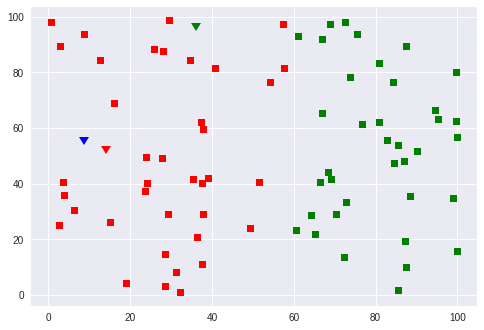

In [12]:
# Run an update, then assign and plot again. 

update()
# print(m)
assignment()


fig = plt.figure()
ax = fig.add_subplot(111)

#ax.scatter(td[0], td[1], s=50, c='GREY', marker='s', label='toydata')
for k in range(K): 
  ax.plot(m[0][k], m[1][k], markersize=10, c=cm[k], marker=11, linewidth=0)

for n in range(N): 
  ax.plot(td[0][n], td[1][n], markersize=7, c=cm[td[2][n]], marker='s', label='toydata', linewidth=0)

plt.show()

In [0]:
def responsibility_size(k):
  return len(list(filter(lambda j: j==k, td[2])))

ought_to_eq_N = 0
for i in range(K): 
  ought_to_eq_N += responsibility_size(i)
  # print(responsibility_size(i))

# print(ought_to_eq_N)

assert ought_to_eq_N == N

### Just a sanity check-- all good!! 

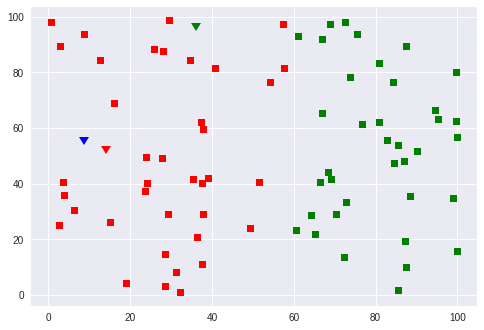

In [14]:

update()

assignment()


fig = plt.figure()
ax = fig.add_subplot(111)

#ax.scatter(td[0], td[1], s=50, c='GREY', marker='s', label='toydata')
for k in range(K): 
  ax.plot(m[0][k], m[1][k], markersize=10, c=cm[k], marker=11, linewidth=0)

for n in range(N): 
  ax.plot(td[0][n], td[1][n], markersize=7, c=cm[td[2][n]], marker='s', label='toydata', linewidth=0)

  

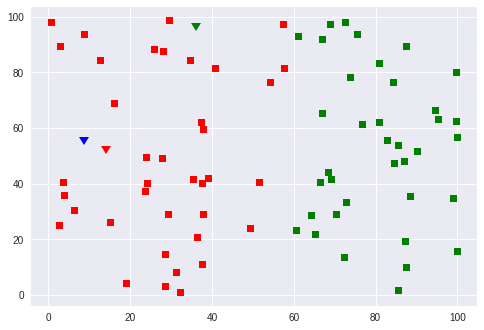

In [16]:

update()

assignment()


fig = plt.figure()
ax = fig.add_subplot(111)

for k in range(K): 
  ax.plot(m[0][k], m[1][k], markersize=10, c=cm[k], marker=11, linewidth=0)

for n in range(N): 
  ax.plot(td[0][n], td[1][n], markersize=7, c=cm[td[2][n]], marker='s', label='toydata', linewidth=0)


In [0]:
## Same thing is happening. 

## ridiculous behavior. 

## something is broken. 

In [0]:
# This is hard clustering: a cluster's "responsibility" over a data point is exactly zero or one. 

## The rest of the chapter goes onto cover soft clustering, where responsibility is in the real interval [0,1], in other words, classification as a matter of degree. 